<a href="https://colab.research.google.com/github/Sptfff/ADA-Informes/blob/main/Informe2_MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problemas de Ordenamiento

**Entrada:** Secuencia de números de tamaño *N*:  $[a_1,a_2,...,a_n]$

**Salida:** Cambio ordenado de la secuencia de entrada: $[a_1',a_2',...,a_n']$, de modo que la secuencia final siga el orden $a_1'\leq a_2' \leq... \leq a_n'$.

![image](https://imgur.com/3IzqosC.jpg)

Los problemas de ordenamiento siempre han sido "complejos" de completar, ya sea por problema de espacio o por un gran número de lo que se desea ordenar.
Por ejemplo en computación siempre se ha buscado la forma más eficiente de ordenar datos, como podría ser una sucesión númerica.

Y aunque a primera vista esto parece un problema sencillo de solucionar, su mayor problema radica en su eficiencia, ya que, aunque la sucesión sea pequeña, la mayoria de algoritmos necesito un gran número de iteraciones para ordenar todo.


#2. MergeSort

##2.1 Descripción del Algoritmo.

MergeSort utiliza la técnica de dividir y conquistar, donde toma el arreglo inicial, y lo divide en sub-arreglos de tamaño *n/2*, donde *n* es el tamaño del arreglo original. Una vez que se llega al límite de división (que sería 1), comienza la conquista, donde se toman los sub-arreglos y se comienzan a fusionar entre si creando un arreglo ordenado con los mismos elementos que el arreglo original


Si *q* es el punto medio del arreglo A, podemos dividir el arreglo en 2 sub-arreglos de modo que queden como *A[0..q]* y *A[q+1...n]*

![image](https://imgur.com/bLnhRVF.jpg)

Despúes de separar el arreglo, se comenzara la etapa de ordenamiento o "conquista", donde se tomara el arreglo *A[p...q]* y *A[q+1...n]* y se comparará cual valor es menor a otro, para posicionarlo a la izquierda del arreglo ordenado.

![image](https://imgur.com/GdhVVdB.jpg)

Cuando la etapa anterior se completa, se obtienen 2 sub-arreglos ordenados, por lo que este paso se encarga de "fusionar" estos arreglos, combinando sus elementos, para un arreglo mayor ordenado


##2.2 Código

In [105]:
import random
from termcolor import colored
import copy

def merge2(izq, der, verbose, conts):
  orden = []

  while len(izq) > 0 and len(der) > 0:
    if izq[0] < der[0]:
      orden.append(izq.pop(0))
    else:
      orden.append(der.pop(0))
    conts[1] += 1

  while len(izq) > 0:
    orden.append(izq.pop(0))
    conts[1] += 1

  while len(der) > 0:
    orden.append(der.pop(0))
    conts[1] += 1

  if verbose == True:
    print(colored(f"Sub-arreglos fusionados: {orden}\n","green"))
    
  return orden

def merge_sort(arr, verbose, conts):
  # conts[0] es el total de las llamadas de la función, y el otro el contador de comparaciones
  if len(arr) <= 1:
    return arr

  else:
  
    middle = len(arr) // 2
    front = arr[:middle]
    back = arr[middle:]

    if verbose == True:
      print(colored(f"Sub-arreglos divididos: {front, back}\n", "blue"))
    #print("Sub-arreglos: ", front, back)

    front = merge_sort(front, verbose, conts)
    back = merge_sort(back, verbose, conts)
    conts[0] += 1
    
    c = []
    c = merge2(front, back, verbose, conts)

    return c

 
# Driver Code
#arr = [12, 11, 13, 6, 81, 9, 15, 23]
arr = random.sample(range(1, 100), 6)
print(colored(f"\nEl arreglo entragado es: {arr}\n", "magenta"))
conts = [0, 0] 
arr = merge_sort(arr, True, conts)

print(colored(f"El arreglo ordenado es: {arr}", "magenta"))
print(colored(f"Llamadas recursivas: {conts[0]}\nNumero de comparaciones: {conts[1]}", "red"))



El arreglo entragado es: [20, 99, 32, 55, 4, 23]

Sub-arreglos divididos: ([20, 99, 32], [55, 4, 23])

Sub-arreglos divididos: ([20], [99, 32])

Sub-arreglos divididos: ([99], [32])

Sub-arreglos fusionados: [32, 99]

Sub-arreglos fusionados: [20, 32, 99]

Sub-arreglos divididos: ([55], [4, 23])

Sub-arreglos divididos: ([4], [23])

Sub-arreglos fusionados: [4, 23]

Sub-arreglos fusionados: [4, 23, 55]

Sub-arreglos fusionados: [4, 20, 23, 32, 55, 99]

El arreglo ordenado es: [4, 20, 23, 32, 55, 99]
Llamadas recursivas: 5
Numero de comparaciones: 16


##2.3 Propiedades del algoritmo



El algoritmo recibe de entrada un arreglo numérico de *N* elemento, el cual deseamos ordenar. Luego, se toman partes del arreglo original, las cuales seran reordenadas de menor a mayor dentro de 2 funciones.

1. En cada iteración, se toma un arreglo inicial, el cual es dividido según la mitad del propio arreglo.

2. Una vez se llega al menor tamaño posible, el cual es 1, se toman los elementos de esos arreglos y se comparan para saber cual sera la posición de cada uno.

3. En comparación a otras funciones, Mergesort tiene una complejidad temporal constante, ya que no importa si el arreglo entregado se encuentra ordenado, la función de igual manera realizara todo su proceso.

3. Aunque si el arreglo entregado es de tamaño 1, si finaliza inmediatamente la ejecución de la función.

4. Al final, se retorna el arreglo ordenado y un contador de comparaciones: T.



#3. Correctitud.

## **3.1 Correctitud de la función MergeSort.**

### **3.1.1** Teorema: 
El algoritmo merge sort recibe un arreglo de n elementos, y retorna un arreglo de n elementos ordenados.

### **3.1.2** Prueba del teorema: 
El algoritmo se llamará a si mismo de forma recursiva, dividiendo en cada iteración los arreglos de largo n que recibe en dos arreglos de largo n/2 con los mismos elementos, para ser combinados en el orden correcto por la función merge, a la cual ya probamos su correctitud.

### **3.1.3** Inicialización:
En la primera iteración se dividirá el arreglo original en dos arreglos [q...r] y [k...p] siendo q y p los límites laterales del arreglo original, y r y k los elementos del medio.

### **3.1.4** Mantención:
Los arreglos subsiguientes se dividirán en arreglos cuya suma de elementos seguirá siendo la cantidad de elementos del arreglo dividido.

### **3.1.4** Finalización:
Ya que cada iteración del algoritmo mantiene la misma cantidad de datos, y que el funcionamiento de la función merge es correcta, se puede afirmar que de un arreglo de largo n, se obtendrá un arreglo de largo n ordenado.



## **3.2 Correctitud de la función Merge.**

### **3.2.1** Teorema: 
La función merge recibe un arreglo de largo n [a1, a2, ... an] y otro de largo m [a1, a2, ... am], luego retorna un arreglo de largo n+m ordenado.

### **3.2.2** Prueba del teorema: 
En cada iteración de la función merge se colocará cada elemento del par de arreglos que recibe de manera ordenada en un arreglo n+m, sí que para probar el teorema utilizaremos la propiedad de bucle invariante.

### **3.2.3** Inicialización:
En la primera iteración el arreglo de salida contendrá solo un valor, el cual se puede considerar que está ordenado, de manera que la propiedad se cumple.

### **3.2.4** Mantención:
El arreglo de salida contendrá i-1 (siendo i el número de iteraciones) datos ordenados, siendo todos los valores restantes a ordenar mayores que los elementos ya ordenados.

### **3.2.5** Finalización:
Ya que se cumple la propiedad al inicio y durante la ejecución del algoritmo, se puede afirmar que se generará un arreglo [a1, a2, ... , a(n+m)] con los mismos elementos de los arreglos de entrada ordenados de menor a mayor.

#4. Tiempo de Ejecución

##Teorema: 
El algoritmo merge sort tiene complejidad O(nlogn) para cualquier caso, debido a que este siempre divide el arreglo en dos mitades y siempre ocupa una cantidad de tiempo lineal para combinar dos mitades.

##Prueba del teorema:
Cuando dividimos un número a la mitad de forma sucesiva, se representa con una función logarítmica, la cual es log n.

Luego, para combinar los sub arreglos resultantes de dividir el arreglo original de n elementos, se necesita un tiempo de ejecución de n.

Por lo tanto, el tiempo de ejecución del algoritmo en su conjunto nos da un tiempo de ejecución de O(nlogn)

##Árbol de recursión

El árbol de recursión en este caso es una representación grafica de lo que hace MergeSort ya que muestra como de un arreglo *n*, se divide en sub-arreglos que corresponden a *n/2*, continuando de manera consecutiva a el nivel más bajo. A este tipo de casos, se describen como *log(n)*, pero como en cada nivel, se asume que se realizan *n* operaciones (en caso del MergeSort, seria la misma función merge), por lo que la notación final quedaría como *nLog(n)*

![image](https://imgur.com/z8z5mJ4.jpg)

#5. Experimentación

##Comparación mejor, peor y caso promedio

Como ya se ha mencionado varias veces, en número de comparaciones de la función MergeSort es constante, ya que no posee mejor o peor caso practicos, ya que siempre se llevara a cabo la funcíon.

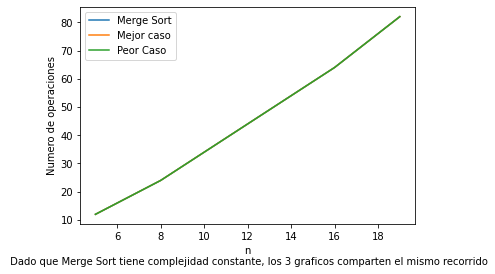

In [106]:
import matplotlib.pyplot as plt
import random
from termcolor import colored

x=[n for n in range(5,20)] 
y1=[] # best case
y2=[] # worst case
y=[]; 

for n in range(5,20):
  a = random.sample(range(1, 100), n)
  conts = [0, 0]
  a = merge_sort(a, False, conts)
  y.append(conts[1])

  conts2 = [0, 0]
  a = merge_sort(a, False, conts2)
  y1.append(conts2[1])
  
  conts3 = [0, 0]
  a = random.sample(range(1, 100), n)
  a[0] = 1234567
  a[n-1] = 1234599
  a = merge_sort(a, False, conts3)
  y2.append(conts3[1])



plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Merge Sort", "Mejor caso", "Peor Caso"])
plt.ylabel('Numero de operaciones')
plt.xlabel('n\n Dado que Merge Sort tiene complejidad constante, los 3 graficos comparten el mismo recorrido')
plt.show()

##Comparasión con Insertion Sort

Como se pueden ver en los graficos, Merge Sort tiende a tener un mayor número de comparaciones que Insertion Sort, pero este ultimo tiende a "demorarse" más tiempo que MergeSort, debido a que Insertion posee una complejidad temporal de *n^2*, mientras que Merge Sort posee una *nLog(n)* como se mencionó con anterioridad.

Esta diferencia se debe a que InsertionSort en un caso promedio recorre n veces su arreglo de tamaño *n*, mientras MergeSort, "corta" el arreglo, de manera sucesiva hasta su tamaño minimo, lo que genera que le tome una cantidad de tiempo que se representa como *log(n)*, y luego para "unir" los elementos le toma una cantidad de tiempo representada como n, dando como resultado como *nLog(n)*

Como conclusión, no se puede decir directamente que función es mejor que otra, ya que cada sirve de manera distinta, ya que a pesar de que InsertionSort tiene un menor número de comparaciones, suele tardarse más que MergeSort con arreglos grandes. 
Por lo que el uso depende de en que se quiere aplicar cada función, dando para casos pequeños, InsertionSort, ya que es más sencillo de aplicar, además de no requerir muchas comparaciones, mientras que para arreglos muy grandes, es necesario el uso de MergeSort, ya que llegaria a ser contraproducente el uso de una función que su tiempo de ejecución escale de manera exponencial.

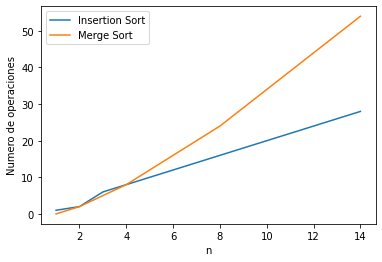

In [107]:
import matplotlib.pyplot as plt
import random

def insertion_sort(a):
    n = len(a)
    T = 0 
    for i in range(1,n+1):
        already_sorted = True
        for z in range (n):
          T += 1
          dato = a[z]
          j = z-1
          while j >= 0 and dato < a[j]:
            a[j+1] = a[j]
            j-= 1
            a[j+1] = dato
            already_sorted = False
        if already_sorted:
            break
    return T

x=[n for n in range(1,15)] 
y1 = []
y=[];

for n in range(1,15):
  a = random.sample(range(1, 100), n)
  conts = [0, 0]
  a = merge_sort(a, False, conts)
  y1.append(conts[1])

for n in range(1,15):
  e = 0
  b = random.sample(range(1, 100), n)
  counter = insertion_sort(b)
  y.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Insertion Sort", "Merge Sort"])
plt.xlabel('n')
plt.ylabel('Numero de operaciones')
plt.show()

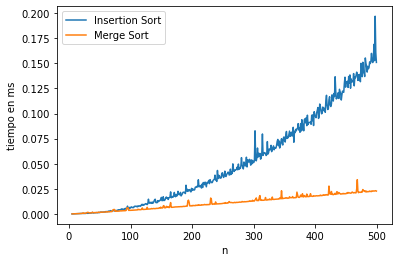

In [108]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

y1 = []
x=[]; y=[]
x1 = []
conts =[]
verbose = False

def merge3(izq, der):
  orden = []
  while len(izq) > 0 and len(der) > 0:
    if izq[0] < der[0]:
      orden.append(izq.pop(0))
    else:
      orden.append(der.pop(0))
  while len(izq) > 0:
    orden.append(izq.pop(0))
  while len(der) > 0:
    orden.append(der.pop(0))
  return orden

def merge_sort2(arr):
  if len(arr) <= 1:
    return arr
  else:
    middle = len(arr) // 2
    front = arr[:middle]
    back = arr[middle:]
    front = merge_sort2(front)
    back = merge_sort2(back)
    c = []
    c = merge3(front, back)
    return c

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import insertion_sort", stmt=f"insertion_sort({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import merge_sort2", stmt=f"merge_sort2({a})", repeat=1, number=10)

  x1.append(n)
  y1.append(t)

plt.plot(x,y)
plt.plot(x1,y1)
plt.legend(["Insertion Sort", "Merge Sort"])
plt.xlabel('n')
plt.ylabel('tiempo en ms')
plt.show()